## P452 - Computational Project 

### Implementation (v1.0) 
- last update: 18-03-2024

In [171]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.animation import FuncAnimation

fig_path = "figures/"
fig_save = True

### v2.0

In [172]:
def simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, dimension = 1, mode = 'monoatomic', iterations_to_save = None):
    '''
    This function simulate the lattice vibrations of a 1D monoatomic lattice.
    
    Parameters:+
    -----------
    N : int
        Number of lattice points.
    T : float
        Total time to simulate.
    Nt : int
        Number of time steps.
    V_X_0 : callable
        function that returns the initial velocity and perturbation of the atoms.
    dxdt : callable
        function that describes the time derivative of the perturbation.
    ddXddt : callable
        function that describes the time derivative of the velocity.
    dimension : int
        Dimension of the lattice.
    mode : str
        Type of lattice. It can be 'monoatomic' or 'diatomic'.
    iterations_to_save : list
        List of iterations to save the solution. If None, it saves the initial and final states.
        if 'all', it saves all the states.
        
    Returns:
    --------
    V_X_list : array
        Array with the solution of the lattice vibrations.
    '''
    
    
    dt = T / Nt  # Temporal step size
    
    # Create arrays to store the solution in time
    V_X_list = []

    # creating initial conditions
    V_X = V_X_0(N)
    
    if iterations_to_save is None:
        iterations_to_save = [0, Nt]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(0, Nt + 1))

    if 0 in iterations_to_save:
        V_X_list.append(np.copy(V_X))
    
    #--------- RK4 time-stepping block ---------#
    for n in tqdm(range(Nt)):
        # Compute spatial derivatives

        k1_X = dXdt(V_X[0][1:-1], V_X[1][1:-1], n * dt)
        k1_V = ddXddt(V_X[0][1:-1], V_X[1][1:-1], n * dt)
        
        k2_X = dXdt(V_X[0][1:-1] + (0.5 * dt * k1_X), V_X[1][1:-1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        k2_V = ddXddt(V_X[0][1:-1] + (0.5 * dt * k1_X), V_X[1][1:-1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        
        k3_X = dXdt(V_X[0][1:-1] + (0.5 * dt * k2_X), V_X[1][1:-1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        k3_V = ddXddt(V_X[0][1:-1] + (0.5 * dt * k2_X), V_X[1][1:-1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        
        k4_X = dXdt(V_X[0][1:-1] + (dt * k3_X), V_X[1][1:-1] + (dt * k3_V), (n * dt) + dt)
        k4_V = ddXddt(V_X[0][1:-1] + (dt * k3_X), V_X[1][1:-1] + (dt * k3_V), (n * dt) + dt)
        
        V_X[0][1:-1] = V_X[0][1:-1] + (dt / 6.0) * (k1_X + (2 * k2_X) + (2 * k3_X) + k4_X)
        V_X[1][1:-1] = V_X[1][1:-1] + (dt / 6.0) * (k1_V + (2 * k2_V) + (2 * k3_V) + k4_V)
        
        if (n + 1) in iterations_to_save:
            V_X_list.append(np.copy(V_X))
    #------------------------------------------#
    
    V_X_list = np.array(V_X_list)
    
    return V_X_list

In [173]:
def animate_lattice_vbrations_1D(X_list, N, T, Nt, a, frames_per_second = 20, time_scale_to = 10, file_name = 'lattice_vibrations_test.gif'):
    positions = np.linspace(1, N, N) * a
    times = np.linspace(0, T, Nt + 1)

    X_list_with_positions = np.zeros(X_list.shape)
    for i, X in enumerate(X_list):
        X_list_with_positions[i] = X + positions
        
        # making an animation of the lattice vibrations
    import matplotlib.animation as animation

    fig = plt.figure(figsize=(10, 5))
    plt.scatter(positions, np.zeros(N),  s=20, color='b', label='Eqlbm positions', alpha=0.5)
    lines = plt.scatter([],[], s=20, color='r', label='Vibrating atom')

    plt.xlim(np.min(X_list_with_positions) - a, np.max(X_list_with_positions) + a)
    plt.ylim(-1, 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
    y = np.zeros(N)

    # frames_per_second = 20
    time_scale = int(T / time_scale_to)

    total_frames = int(np.floor((frames_per_second * T) / time_scale))
    frame_skip = int(np.floor((Nt / total_frames)))

    print(f'Total frames: {total_frames}')
    print(f'Frame skip: {frame_skip}')

    def animate(i):
        j = (i * frame_skip) + 1
        lines.set_offsets(np.column_stack((X_list_with_positions[j], y)))
        # displaying the time
        plt.title(f'Lattice Vibrations, t = {times[j]:.2f}')
        return lines,

    ani = animation.FuncAnimation(fig, animate, frames=total_frames)

    # gif file
    if fig_save:
        ani.save(fig_path + file_name, writer='pillow', fps=frames_per_second)
        
    plt.show()

In [179]:
# theoretical solution

def theoretical_result(N, T, Nt, dimension = 1, mode = 'monoatomic'):
    
    omega_theoretical = np.sqrt((2 * np.abs(k) / mass) * (1 - np.cos(wave_k * a)))
    
    atomic_indices = np.linspace(1, N, N)
    
    X = np.zeros((Nt + 1, N))
    
    for n in range(Nt + 1):
        X[n] = (A) * np.cos(wave_k * atomic_indices * a - (omega_theoretical * n * T / Nt))
        
    return np.copy(X), np.copy(omega_theoretical)

In [175]:
def lattice_vibrations_analysis(X_list, N, T, Nt, omega_theoretical = None, trial_name = "test", frequency_range_scale = 1):
    # frequency analysis of the lattice vibrations
    X_list2 = X_list.T # (T, N) -> (N, T)

    # Fourier transform
    X_list_fft = np.fft.fft(X_list2, axis = 1)
    X_list_fft = np.abs(X_list_fft) # get the magnitude of the Fourier transform
    
    # frequencies
    frequencies = np.fft.fftfreq(Nt + 1, T / (Nt))
    
    # only positive frequencies and not the zero frequency
    frequencies = frequencies[1:int((Nt + 1) / 2)]
    X_list_fft = X_list_fft[:, 1:int((Nt + 1) / 2)]
    
    # frequency range
    frequencies2 = frequencies[:int(frequency_range_scale * len(frequencies))]
    X_list_fft2 = X_list_fft[:, :int(frequency_range_scale * len(frequencies))]

    # plotting fourier transform of one of the atoms
    plt.figure(figsize=(10,5))
    for i in range(N):
        plt.plot(frequencies2, X_list_fft2[i], label=f'Atom {i + 1}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'Fourier transform of the lattice vibrations of all atom')
    plt.grid()
    plt.legend()
    if fig_save:
        plt.savefig(fig_path + f'lattice_vibrations_fourier_{trial_name}.png')
    plt.show()


    # finding the frequency with the maximum amplitude for each atom
    max_amplitude = np.max(X_list_fft, axis = 1)
    max_amplitude_index = np.argmax(X_list_fft, axis = 1)
    max_amplitude_frequency = frequencies[max_amplitude_index]

    # plotting the frequencies
    plt.figure(figsize=(10,5))
    plt.plot(np.linspace(1, N, N), max_amplitude_frequency, 'o')
    plt.xlabel('Atom index')
    plt.ylabel('Frequency')
    plt.title('Dominant Frequencies of the lattice vibrations')
    if omega_theoretical is not None:
        plt.hlines(omega_theoretical / (2 * np.pi), 0, N, color='r', label='Theoretical frequency')
    plt.grid()
    try: plt.legend()
    except: pass
    if fig_save:
        plt.savefig(fig_path + f'lattice_vibrations_frequency_{trial_name}.png')
        
    plt.show()
    
    return max_amplitude_frequency

In [176]:
def lattice_vibrations_analysis_data(X_list, N, T, Nt, frequency_range_scale = 1):
    # frequency analysis of the lattice vibrations
    X_list2 = X_list.T # (T, N) -> (N, T)

    # Fourier transform
    X_list_fft = np.fft.fft(X_list2, axis = 1)
    X_list_fft = np.abs(X_list_fft) # get the magnitude of the Fourier transform
    
    # frequencies
    frequencies = np.fft.fftfreq(Nt + 1, T / (Nt))
    
    # only positive frequencies and not the zero frequency
    frequencies = frequencies[1:int((Nt + 1) / 2)]
    X_list_fft = X_list_fft[:, 1:int((Nt + 1) / 2)]
    
    # frequency range
    frequencies2 = frequencies[:int(frequency_range_scale * len(frequencies))]
    X_list_fft2 = X_list_fft[:, :int(frequency_range_scale * len(frequencies))]

    # freq_list = []
    # fftpeak_list = []
    
    # for i in range(N):
    #     freq_list.extend(frequencies2)
    #     fftpeak_list.extend(X_list_fft2[i])

    # finding the frequency with the maximum amplitude for each atom
    atomic_indices2 = np.linspace(1, N, N)
    # max_amplitude = np.max(X_list_fft, axis = 1)
    max_amplitude_index = np.argmax(X_list_fft, axis = 1)
    max_amplitude_frequency = frequencies[max_amplitude_index]

    
    return np.copy(frequencies2), np.copy(X_list_fft2), np.copy(atomic_indices2), np.copy(max_amplitude_frequency)

In [177]:
def animate_to_gif(X_list, Y_lists, T_list, file_name, frames_per_second = 25, X_label = 'X', Y_label = 'Y', title = 'Evolution', x_lim = None, y_lim = None):
    
    # Creating a plot
    figure = plt.figure(figsize=(12, 6))

    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.xlim(np.min(X_list), np.max(X_list))
    plt.grid()

    def update(frame):
        plt.cla()
        line1 = plt.plot(X_list, Y_lists[frame])
        plt.title(f"{title} = {T_list[frame]:.4f}")
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
        return line1

    anim = FuncAnimation(figure, update, frames = len(Y_lists))

    anim.save(fig_path + file_name, writer='pillow', fps = frames_per_second)

In [178]:
def animate_to_gif_advanced(X_list, Y_listss, T_list, file_name, frames_per_second = 25, X_label = 'X', Y_label = 'Y', title = 'Evolution at t', labels=None, x_lim = None, y_lim = None):
    
    N_lines = len(Y_listss)
    if labels is None:
        labels = [str(i) for i in range(N_lines)]
    
    # Creating a plot
    figure = plt.figure(figsize=(12, 6))

    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.xlim(np.min(X_list), np.max(X_list))
    plt.grid()

    def update(frame):
        plt.cla()
        for i in range(N_lines):
            line1 = plt.plot(X_list, Y_listss[i][frame], label=labels[i])
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        plt.legend()
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
        plt.title(f"{title} = {T_list[frame]:.4f}")
        return line1

    anim = FuncAnimation(figure, update, frames=len(Y_listss[0]))

    anim.save(fig_path + file_name, writer='pillow', fps = frames_per_second)

### Implementation

In [116]:
N = 11
a = 1 # Lattice spacing
T = 150
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial15_normalmode'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    V_X[0] = A * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

In [117]:
X_list_theoretical, omega_theoretical = theoretical_result(N, T, Nt)
print(X_list_theoretical.shape)

(150001, 11)


Total frames: 857
Frame skip: 350


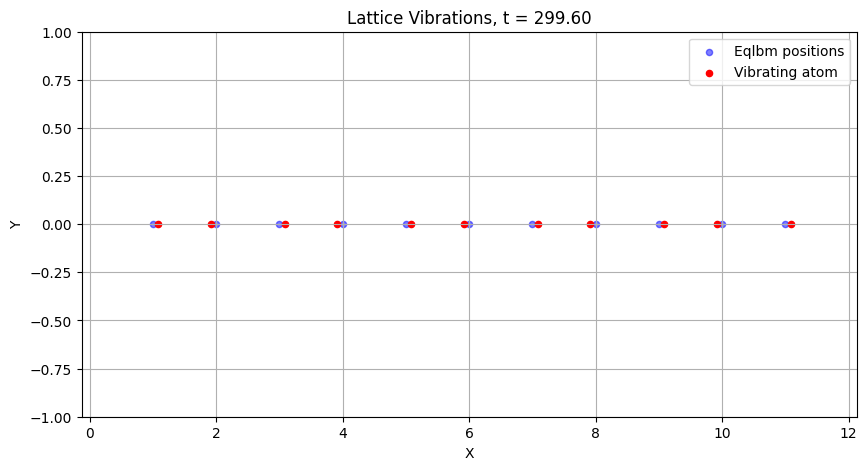

In [10]:
animate_lattice_vbrations_1D(X_list_theoretical, N, T, Nt, a, frames_per_second = 20, time_scale_to = 40, file_name=f'lattice_vibrations_theoretical_{trial_name}.gif')

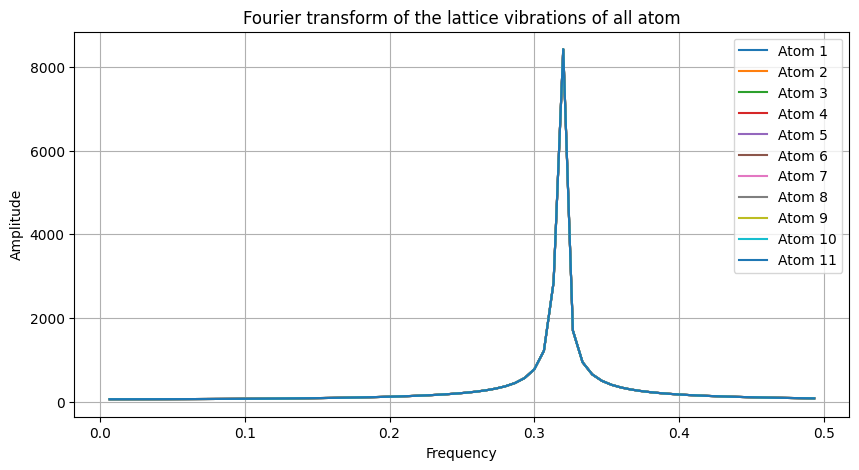

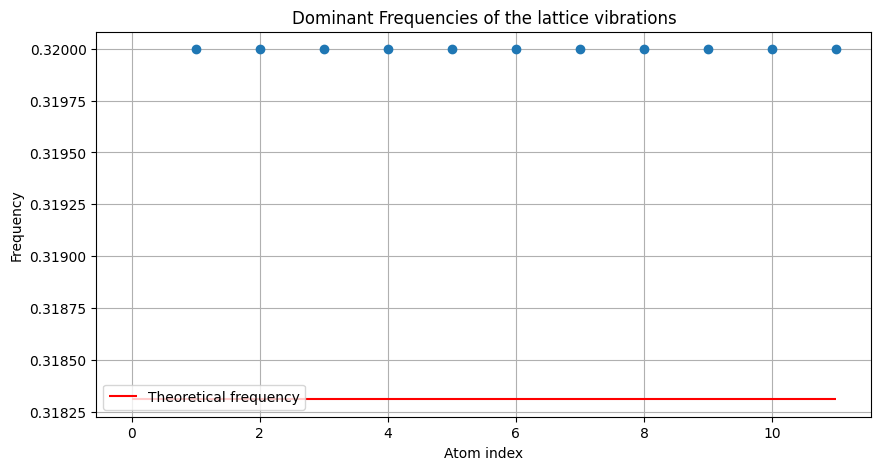

In [118]:
freq_theoretical_fft = lattice_vibrations_analysis(X_list_theoretical, N, T, Nt, omega_theoretical, trial_name+'theoretical', frequency_range_scale=0.001)

In [119]:
V_X_list = simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, iterations_to_save = 'all')
print(V_X_list.shape)

100%|██████████| 150000/150000 [02:17<00:00, 1094.09it/s]


(150001, 2, 11)


In [120]:
X_list = V_X_list[:,0]
print(X_list.shape)

(150001, 11)


Total frames: 857
Frame skip: 350


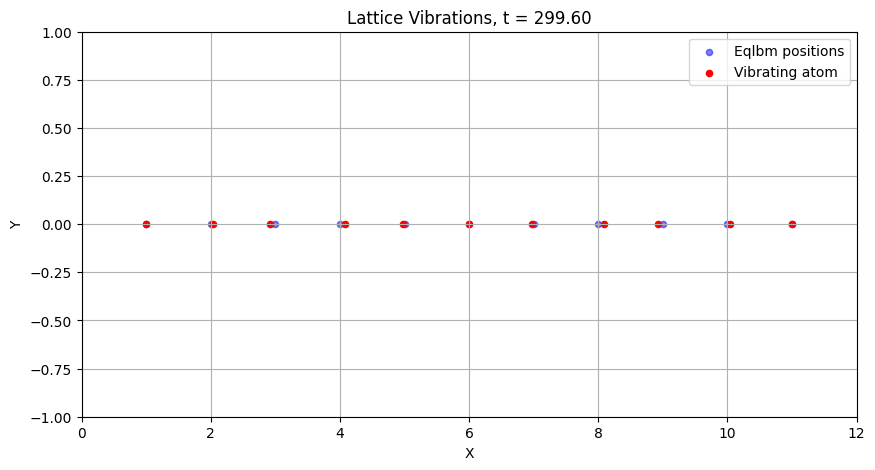

In [20]:
animate_lattice_vbrations_1D(X_list, N, T, Nt, a, frames_per_second = 20, time_scale_to = 40, file_name=f'lattice_vibrations_{trial_name}.gif')

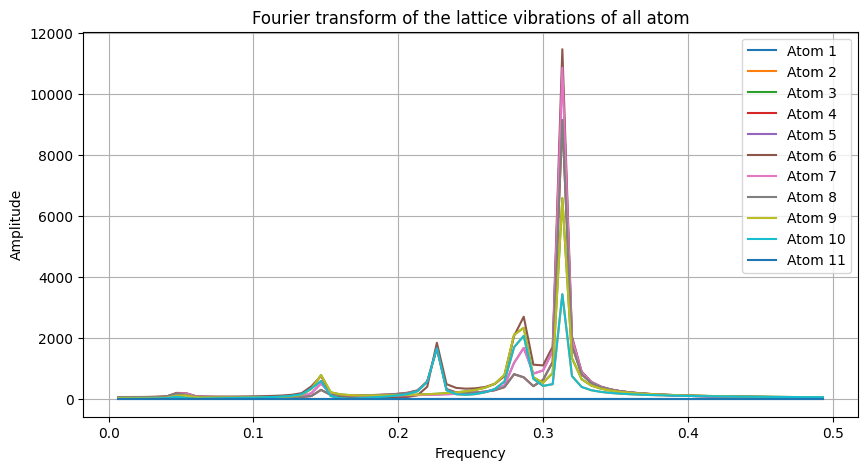

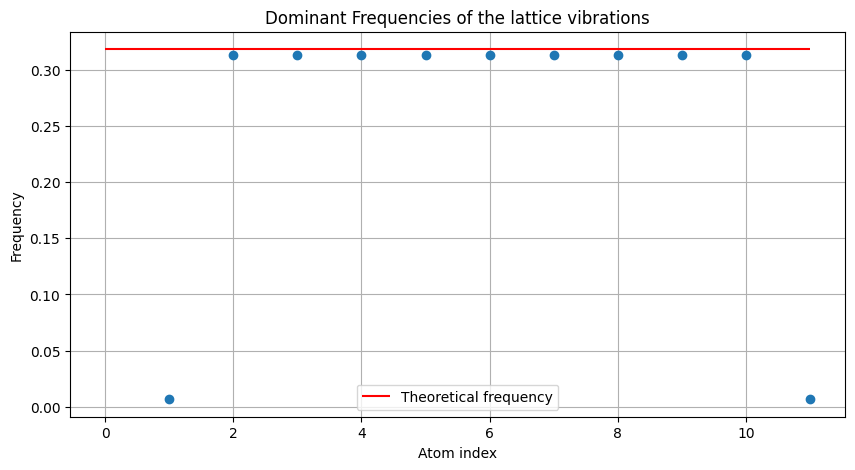

In [121]:
freq_obs_fft = lattice_vibrations_analysis(X_list, N, T, Nt, omega_theoretical, trial_name, frequency_range_scale=0.001)
frequencies2, X_list_fft2, atomic_indices2, max_amplitude_frequency = lattice_vibrations_analysis_data(X_list, N, T, Nt, frequency_range_scale=0.001)

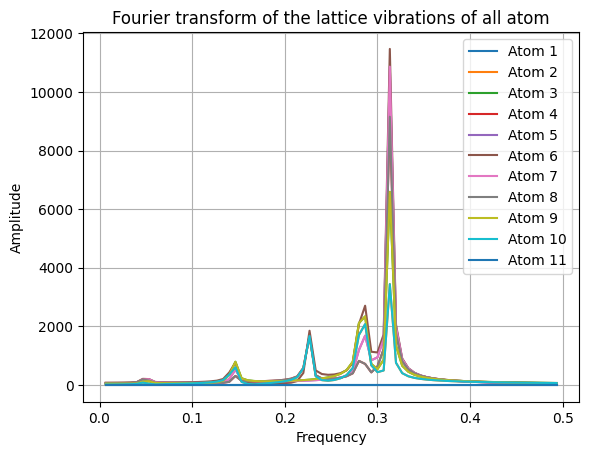

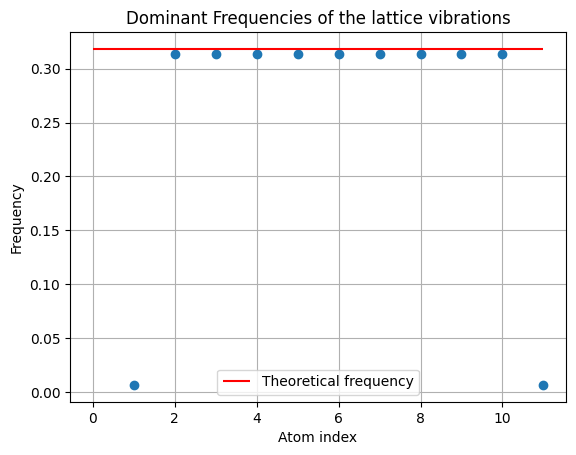

In [122]:
# using the data to draw the same plot
for i in range(N):
    plt.plot(frequencies2, X_list_fft2[i], label=f'Atom {i + 1}')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title(f'Fourier transform of the lattice vibrations of all atom')
plt.grid()
plt.legend()
# if fig_save:
#     plt.savefig(fig_path + f'lattice_vibrations_fourier_{trial_name}.png')
plt.show()

plt.plot(np.linspace(1, N, N), max_amplitude_frequency, 'o')
plt.xlabel('Atom index')
plt.ylabel('Frequency')
plt.title('Dominant Frequencies of the lattice vibrations')
plt.hlines(omega_theoretical / (2 * np.pi), 0, N, color='r', label='Theoretical frequency')
plt.grid()
plt.legend()
# if fig_save:
#     plt.savefig(fig_path + f'lattice_vibrations_frequency_{trial_name}.png')
plt.show()

### Experimental perturbations

In [79]:
N = 11
a = 1 # Lattice spacing
T = 300
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial13'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    np.random.seed(5)
    
    V_X[0][1:-1] = A * np.random.rand(N - 2)
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

100%|██████████| 300000/300000 [08:11<00:00, 610.16it/s]


(300001, 2, 11)
(300001, 11)
Total frames: 200
Frame skip: 1500


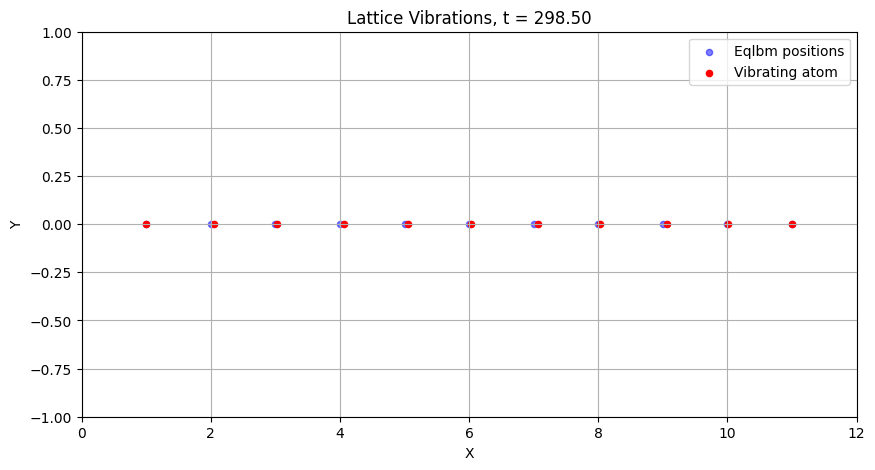

In [80]:
V_X_list = simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, iterations_to_save = 'all')
print(V_X_list.shape)

X_list = V_X_list[:,0]
print(X_list.shape)


animate_lattice_vbrations_1D(X_list, N, T, Nt, a, frames_per_second = 20, time_scale_to = 10, file_name=f'lattice_vibrations_{trial_name}.gif')

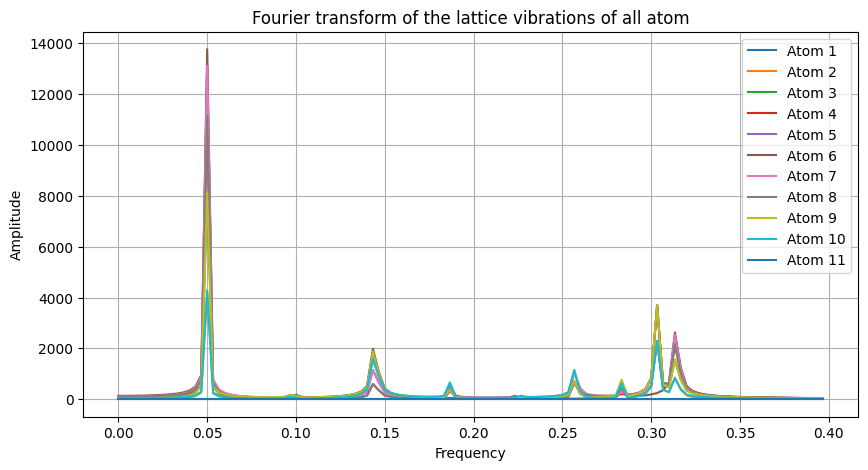

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


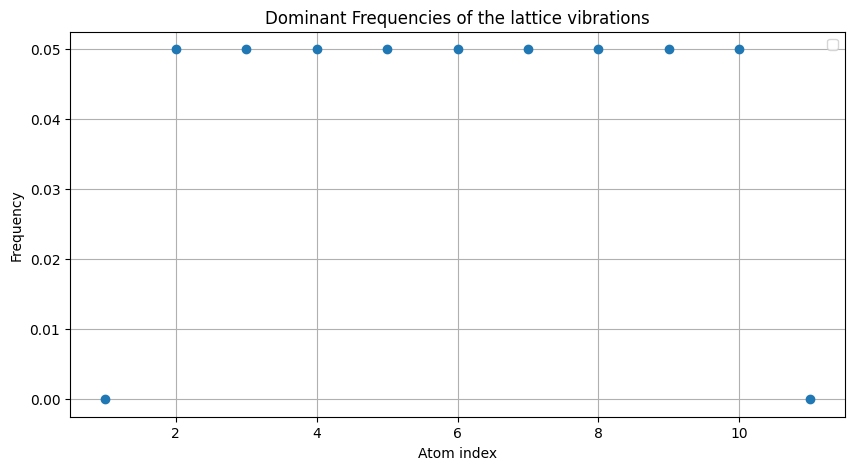

In [81]:
freq_obs_fft = lattice_vibrations_analysis(X_list, N, T, Nt, None, trial_name, frequency_range_scale=0.0008)

### Storage of trial settings done

In [155]:
############################################

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial5'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) * (A)
    V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V


############################################

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial4'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) * (A)
    V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V


############################################
# new 3 - old model (not used in the report)

N = 10
a = 1 # Lattice spacing
T = 30
Nt = 600
mass = 1
k = 1

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) * (a / 8)
    V_X[0][0] = 0
    V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity
    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V
    
############################################

N = 11
a = 1 # Lattice spacing
T = 30
Nt = 6000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial6'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0][N // 2] = A
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 30
Nt = 60000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial7'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0][N // 2] = A
    # V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    # V_X[0][0] = 0
    # V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 30
Nt = 600000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial8'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0][N // 2] = A
    # V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    # V_X[0][0] = 0
    # V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 300
Nt = 6000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial9'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0][N // 2] = A
    # V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    # V_X[0][0] = 0
    # V_X[0][-1] = 0
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V


############################################

N = 11
a = 1 # Lattice spacing
T = 300
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial10'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))

    V_X[0][N // 2] = A
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 300
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial11'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    np.random.seed(3)
    
    V_X[0][1:-1] = A * np.random.rand(N - 2)
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 300
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial12'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    np.random.seed(4)
    
    V_X[0][1:-1] = A * np.random.rand(N - 2)
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 300
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial13'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    np.random.seed(5)
    
    V_X[0][1:-1] = A * np.random.rand(N - 2)
    
    V_X[1] = np.zeros(N) # initial velocity

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 300
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial14_normalmode'

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    V_X[0] = V_X[0] * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 11
a = 1 # Lattice spacing
T = 150
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial_dispersion'
wave_k_range = (0 , 2 * np.pi / a)
N_sims = 15

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    V_X[0] = A * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

############################################

N = 21
a = 1 # Lattice spacing
T = 150
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial2_dispersion'
wave_k_range = (0 , 2 * np.pi / a)
N_sims = 15

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    V_X[0] = A * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

# some conclusions

- Due to the ends fixed, the number of modes are reduced by 2 (?)
- reducing time step too much, doesnt bring resolution to frequency.
- saw symmetry of modes along atoms, when a symmetric perturbation is used (?)
- When a completely random modes are used, the system is giving all the modes (?)

### Dispersion relation (experiment)

In [195]:
N = 21
a = 1 # Lattice spacing
T = 150
Nt = T * 1000
mass = 1
k = 1
wave_k = np.pi / a
A = a / 8
trial_name = 'trial2_dispersion'
wave_k_range = (0 , 2 * np.pi / a)
N_sims = 15

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    V_X[0] = A * np.cos(wave_k * atomic_indices * a)
    V_X[0][0] = 0
    V_X[0][-1] = 0

    return V_X

def ddXddt(X, V, t):
    X = np.pad(X, (1,1), mode='constant')
    dXdt_val = - (k / mass) * ((2*X[1:-1]) - X[:-2] - X[2:])
    return dXdt_val

def dXdt(X, V, t):
    return V

In [196]:
all_freq_list = []
all_fft_list = []
all_max_amplitude_frequency = []

all_freq_list_theoretical = []
all_fft_list_theoretical = []
all_max_amplitude_frequency_theoretical = []

frequency_range_scale = 1

for wave_k in np.linspace(wave_k_range[0], wave_k_range[1], N_sims):
    print(f"Simulating for wave number: {wave_k}")

    X_list_theoretical, omega_theoretical = theoretical_result(N, T, Nt)
    freq_list_theoretical, fft_list_theoretical, atomic_indices_theoretical, max_amplitude_frequency_theoretical = lattice_vibrations_analysis_data(X_list_theoretical, N, T, Nt, frequency_range_scale)


    V_X_list = simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, iterations_to_save = 'all')
    X_list = V_X_list[:,0]
    freq_list, fft_list, atomic_indices, max_amplitude_frequency = lattice_vibrations_analysis_data(X_list, N, T, Nt, frequency_range_scale)

    all_freq_list.append(np.copy(freq_list))
    all_fft_list.append(np.copy(fft_list))
    all_max_amplitude_frequency.append(np.copy(max_amplitude_frequency))

    all_freq_list_theoretical.append(np.copy(freq_list_theoretical))
    all_fft_list_theoretical.append(np.copy(fft_list_theoretical))
    all_max_amplitude_frequency_theoretical.append(np.copy(max_amplitude_frequency_theoretical))

np.save(f'data/{trial_name}_all_freq_list.npy', all_freq_list)
np.save(f'data/{trial_name}_all_fft_list.npy', all_fft_list)
np.save(f'data/{trial_name}_all_max_amplitude_frequency.npy', all_max_amplitude_frequency)

np.save(f'data/{trial_name}_all_freq_list_theoretical.npy', all_freq_list_theoretical)
np.save(f'data/{trial_name}_all_fft_list_theoretical.npy', all_fft_list_theoretical)
np.save(f'data/{trial_name}_all_max_amplitude_frequency_theoretical.npy', all_max_amplitude_frequency_theoretical)

Simulating for wave number: 0.0


100%|██████████| 150000/150000 [02:16<00:00, 1098.45it/s]


Simulating for wave number: 0.4487989505128276


100%|██████████| 150000/150000 [02:16<00:00, 1100.05it/s]


Simulating for wave number: 0.8975979010256552


100%|██████████| 150000/150000 [02:15<00:00, 1104.39it/s]


Simulating for wave number: 1.3463968515384828


100%|██████████| 150000/150000 [02:16<00:00, 1097.14it/s]


Simulating for wave number: 1.7951958020513104


100%|██████████| 150000/150000 [02:16<00:00, 1100.97it/s]


Simulating for wave number: 2.243994752564138


100%|██████████| 150000/150000 [02:16<00:00, 1102.18it/s]


Simulating for wave number: 2.6927937030769655


100%|██████████| 150000/150000 [02:16<00:00, 1097.64it/s]


Simulating for wave number: 3.141592653589793


100%|██████████| 150000/150000 [02:15<00:00, 1105.60it/s]


Simulating for wave number: 3.5903916041026207


100%|██████████| 150000/150000 [02:16<00:00, 1102.42it/s]


Simulating for wave number: 4.039190554615448


100%|██████████| 150000/150000 [02:16<00:00, 1101.33it/s]


Simulating for wave number: 4.487989505128276


100%|██████████| 150000/150000 [02:15<00:00, 1104.62it/s]


Simulating for wave number: 4.9367884556411035


100%|██████████| 150000/150000 [02:15<00:00, 1107.00it/s]


Simulating for wave number: 5.385587406153931


100%|██████████| 150000/150000 [02:15<00:00, 1103.15it/s]


Simulating for wave number: 5.834386356666759


100%|██████████| 150000/150000 [02:16<00:00, 1102.12it/s]


Simulating for wave number: 6.283185307179586


100%|██████████| 150000/150000 [02:15<00:00, 1104.11it/s]


In [197]:
# loading the data
# trial_name_ = trial_name
trial_name_ = 'trial2_dispersion'

all_freq_list = np.load(f'data/{trial_name_}_all_freq_list.npy')
all_fft_list = np.load(f'data/{trial_name_}_all_fft_list.npy')
all_max_amplitude_frequency = np.load(f'data/{trial_name_}_all_max_amplitude_frequency.npy')

all_freq_list_theoretical = np.load(f'data/{trial_name_}_all_freq_list_theoretical.npy')
all_fft_list_theoretical = np.load(f'data/{trial_name_}_all_fft_list_theoretical.npy')
all_max_amplitude_frequency_theoretical = np.load(f'data/{trial_name_}_all_max_amplitude_frequency_theoretical.npy')


In [198]:
all_freq_list = np.array(all_freq_list)
all_fft_list = np.array(all_fft_list)
# all_atomic_indices = np.array(all_atomic_indices)
all_max_amplitude_frequency = np.array(all_max_amplitude_frequency)

all_freq_list_theoretical = np.array(all_freq_list_theoretical)
all_fft_list_theoretical = np.array(all_fft_list_theoretical)
# all_atomic_indices_theoretical = np.array(all_atomic_indices_theoretical)
all_max_amplitude_frequency_theoretical = np.array(all_max_amplitude_frequency_theoretical)

In [199]:
print(all_freq_list.shape)
print(all_fft_list.shape)
print(all_max_amplitude_frequency.shape)

print(all_freq_list_theoretical.shape)
print(all_fft_list_theoretical.shape)
print(all_max_amplitude_frequency_theoretical.shape)

(15, 74999)
(15, 21, 74999)
(15, 21)
(15, 74999)
(15, 21, 74999)
(15, 21)


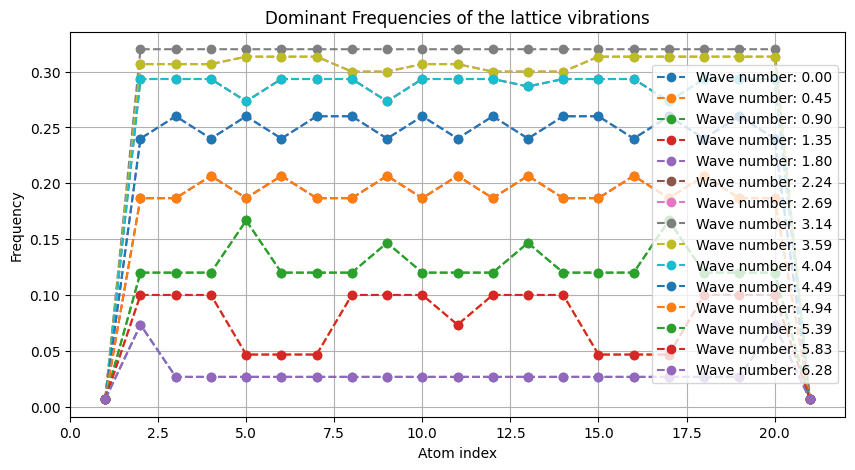

In [200]:
# index = 0
atomic_indices = np.linspace(1, N, N)
# max_amplitude_frequency = all_max_amplitude_frequency[index]
wave_ks = np.linspace(wave_k_range[0], wave_k_range[1], N_sims)

plt.figure(figsize=(10,5))
for i in range(N_sims):
    plt.plot(atomic_indices, all_max_amplitude_frequency[i], 'o--', label=f'Wave number: {wave_ks[i]:.2f}')
plt.xlabel('Atom index')
plt.ylabel('Frequency')
plt.title('Dominant Frequencies of the lattice vibrations')
plt.grid()
plt.legend()
plt.savefig(f'figures/{trial_name}_dominant_frequencies.png')
plt.show()

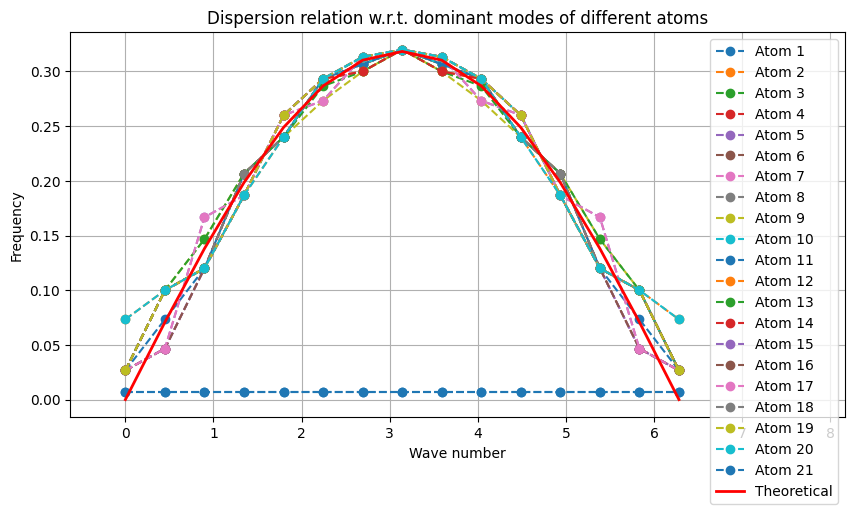

In [201]:
# atomic_index = 2 # the peak frequencies of the atom at index 2 across different wave numbers

wave_ks = np.linspace(wave_k_range[0], wave_k_range[1], N_sims)
max_frequencies_each_atoms = np.array([[all_max_amplitude_frequency[i, atomic_index] for i in range(N_sims)] for atomic_index in range(N)])

# max_frequencies_each_atoms_theoretical = np.array([[all_max_amplitude_frequency_theoretical[i, atomic_index] for i in range(N_sims)] for atomic_index in range(N)])
dispersion_frequencies = 2 * np.sqrt(k / mass) * np.abs(np.sin(wave_ks * a / 2)) / (2 * np.pi)

plt.figure(figsize=(10,5))
for i in range(N):
    plt.plot(wave_ks, max_frequencies_each_atoms[i], 'o--', label=f'Atom {i+1}')
plt.plot(wave_ks, dispersion_frequencies, 'r-', label='Theoretical', lw = 2)

plt.xlabel('Wave number')
plt.ylabel('Frequency')
plt.title('Dispersion relation w.r.t. dominant modes of different atoms')
plt.xlim(wave_k_range[0] - 0.1 * (wave_k_range[1] - wave_k_range[0]), wave_k_range[1] + 0.3 * (wave_k_range[1] - wave_k_range[0]))
plt.grid()
plt.legend()
plt.savefig(f'figures/{trial_name}_dispersion.png')
plt.show()

In [28]:
print(all_max_amplitude_frequency)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Dispersion relation (theory)

In [30]:
all_freq_list = []
all_fft_list = []
all_max_amplitude_frequency = []

all_freq_list_theoretical = []
all_fft_list_theoretical = []
all_max_amplitude_frequency_theoretical = []

for wave_k_val in np.linspace(wave_k_range[0],wave_k_range[1],3):
    
    wave_k = wave_k_val # current wave number
    
    X_list_theoretical, omega_theoretical = theoretical_result(N, T, Nt)
    freq_list_theoretical, fft_list_theoretical, atomic_indices_theoretical, max_amplitude_frequency_theoretical = lattice_vibrations_analysis_data(X_list_theoretical, N, T, Nt)
    
    
    X_list = simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, iterations_to_save = 'all')[:,0]
    freq_list, fft_list, atomic_indices, max_amplitude_frequency = lattice_vibrations_analysis_data(X_list, N, T, Nt)
    
    # f_theoretical = omega_theoretical / (2 * np.pi)
    
    all_freq_list.append(freq_list)
    all_fft_list.append(fft_list)
    all_max_amplitude_frequency.append(max_amplitude_frequency)
    
    all_freq_list_theoretical.append(freq_list_theoretical)
    all_fft_list_theoretical.append(fft_list_theoretical)
    all_max_amplitude_frequency_theoretical.append(max_amplitude_frequency_theoretical)
    
np.save(f'data/{trial_name}_all_freq_list.npy', all_freq_list)
np.save(f'data/{trial_name}_all_fft_list.npy', all_fft_list)
np.save(f'data/{trial_name}_all_max_amplitude_frequency.npy', all_max_amplitude_frequency)

np.save(f'data/{trial_name}_all_freq_list_theoretical.npy', all_freq_list_theoretical)
np.save(f'data/{trial_name}_all_fft_list_theoretical.npy', all_fft_list_theoretical)
np.save(f'data/{trial_name}_all_max_amplitude_frequency_theoretical.npy', all_max_amplitude_frequency_theoretical)

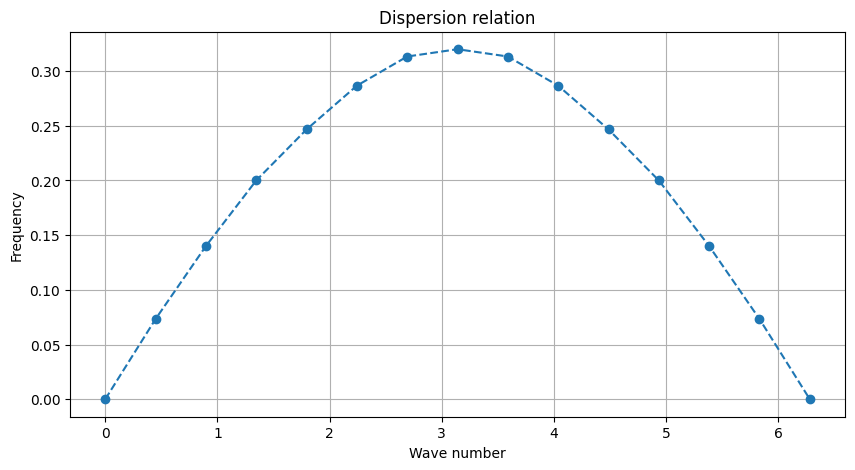

In [31]:
# plotting the dispersion relation
all_max_amplitude_frequency_theoretical = np.array(all_max_amplitude_frequency_theoretical)
all_freq_list_theoretical = np.array(all_freq_list_theoretical)
all_fft_list_theoretical = np.array(all_fft_list_theoretical)

max_frequency_per_wave_k_theoretical = np.max(all_max_amplitude_frequency_theoretical, axis = 1)
wave_ks = np.linspace(wave_k_range[0],wave_k_range[1],15)

plt.figure(figsize=(10,5))
plt.plot(wave_ks, max_frequency_per_wave_k_theoretical, 'o--')
plt.xlabel('Wave number')
plt.ylabel('Frequency')
plt.title('Dispersion relation')
plt.grid()
# plt.savefig(f'figures/{trial_name}_dispersion_theoretical.png')
plt.show()